In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
loan_data=pd.read_csv("loan.csv")
loan_data


C:\Users\mohdm\AppData\Local\Temp\ipykernel_1700\2118579851.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data=pd.read_csv("C:\\Users\\mohdm\\Downloads\\loan\\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Checking for missing values and data types in the dataset
missing_values = loan_data.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(loan_data)) * 100

# Display the top 20 columns with the most missing data
missing_data_top_20 = missing_values_percentage.head(20)

# Display the number of unique values for each column to identify categorical features
unique_values = loan_data.nunique().sort_values(ascending=False)

missing_data_top_20, unique_values.head(20)


(total_il_high_credit_limit     100.0
 verification_status_joint      100.0
 inq_fi                         100.0
 mo_sin_rcnt_tl                 100.0
 mo_sin_rcnt_rev_tl_op          100.0
 mo_sin_old_rev_tl_op           100.0
 mo_sin_old_il_acct             100.0
 bc_util                        100.0
 bc_open_to_buy                 100.0
 avg_cur_bal                    100.0
 mths_since_last_major_derog    100.0
 acc_open_past_24mths           100.0
 inq_last_12m                   100.0
 annual_inc_joint               100.0
 dti_joint                      100.0
 total_cu_tl                    100.0
 mths_since_recent_bc_dlq       100.0
 tot_coll_amt                   100.0
 tot_cur_bal                    100.0
 open_acc_6m                    100.0
 dtype: float64,
 url                        39717
 total_pymnt                37850
 total_pymnt_inv            37518
 total_rec_int              35148
 last_pymnt_amnt            34930
 emp_title                  28820
 desc              

In [9]:
# Drop columns with 100% missing data
columns_to_drop = missing_values[missing_values_percentage == 100].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

# Drop irrelevant high-cardinality columns
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title']
loan_data_cleaned = loan_data_cleaned.drop(columns=columns_to_drop)

# Display the shape of the cleaned dataset and verify if columns have been dropped
cleaned_shape = loan_data_cleaned.shape
cleaned_columns = loan_data_cleaned.columns

cleaned_shape, cleaned_columns


((39717, 51),
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
        'annual_inc', 'verification_status', 'issue_d', 'loan_status',
        'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
        'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
        'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
        'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
        'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
        'policy_code', 'application_type', 'acc_now_delinq',
        'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
        'tax_liens'],
       dtype='object'))

In [11]:
loan_data_cleaned


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [12]:
# Analyze the distribution of loan statuses
loan_status_distribution = loan_data_cleaned['loan_status'].value_counts(normalize=True) * 100
print(loan_status_distribution)


loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: proportion, dtype: float64


In [14]:
loan_data_cleaned['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [15]:
loan_data_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [16]:
loan_data_cleaned.index.size


39717

In [17]:
len(loan_data_cleaned.columns)

51

In [18]:
loan_data_cleaned.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: proportion, dtype: float64


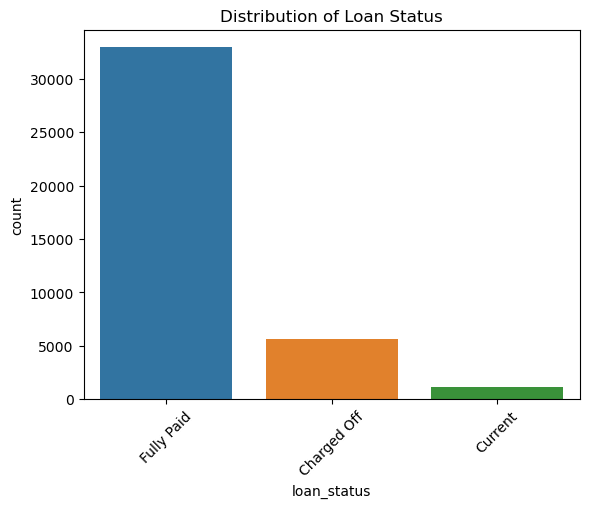

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of loan statuses
loan_status_distribution = loan_data_cleaned['loan_status'].value_counts(normalize=True) * 100
print(loan_status_distribution)

# Plotting the distribution
sns.countplot(x='loan_status', data=loan_data_cleaned)
plt.title('Distribution of Loan Status')
plt.xticks(rotation=45)
plt.show()


Separate the data into defaulters and non-defaulters to perform univariate analysis and plot the figures

C:\Users\mohdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


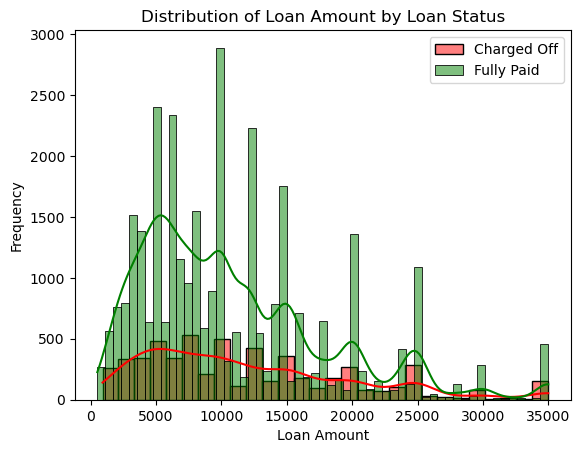

In [28]:

charged_off = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off']
fully_paid = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Fully Paid']

# Plot distributions
sns.histplot(charged_off['loan_amnt'], kde=True, color='red', label='Charged Off')
sns.histplot(fully_paid['loan_amnt'], kde=True, color='green', label='Fully Paid')
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


For smaller amounts the frequency of payoff is higher than for bigger amounts not conclusive

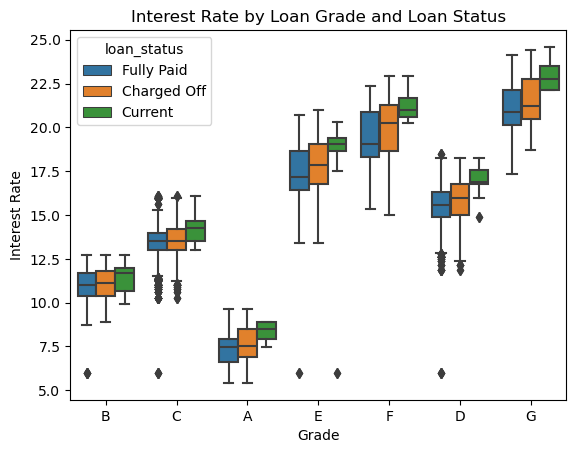

In [29]:
# Box plot of interest rate by grade for each loan status
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_data_cleaned)
plt.title('Interest Rate by Loan Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()


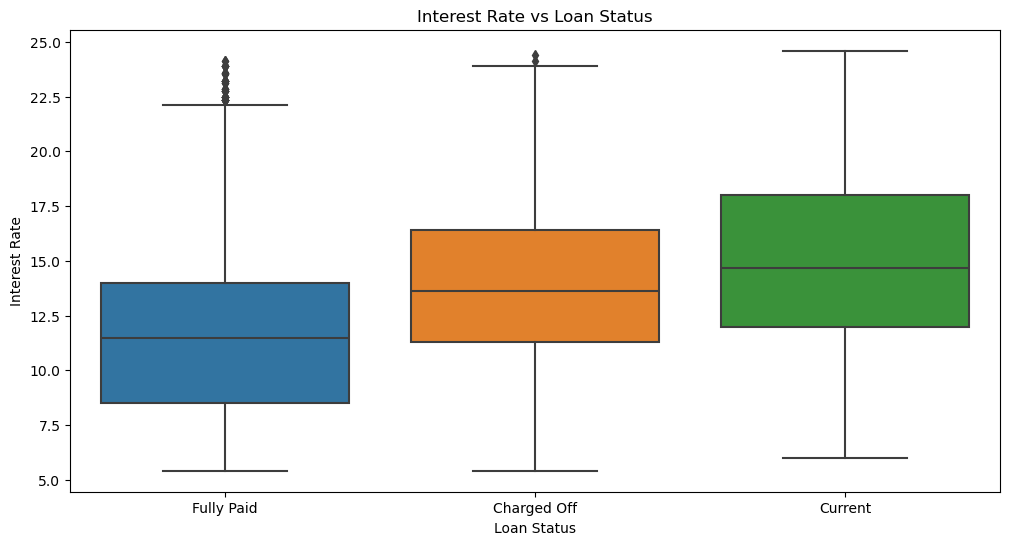

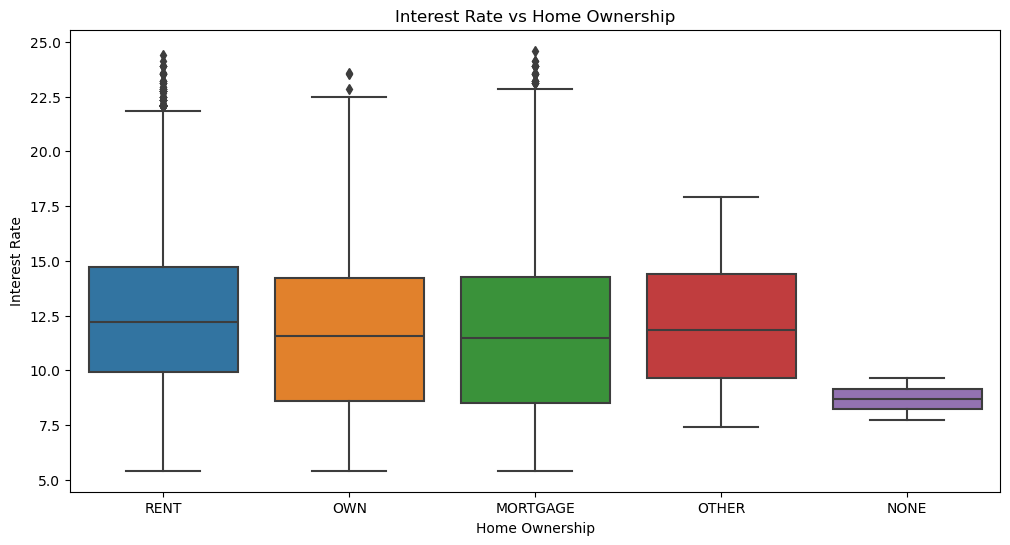

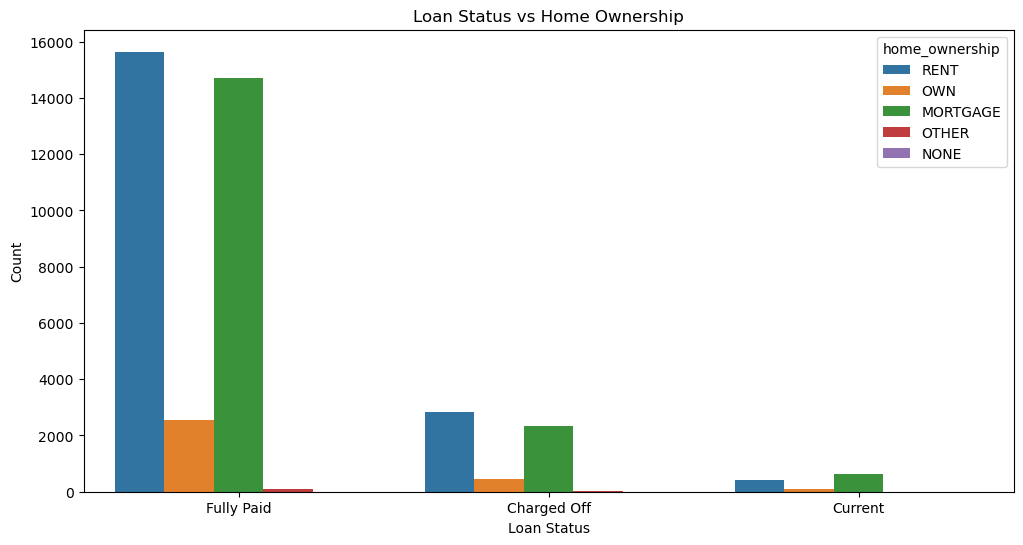

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

# Bivariate Analysis: Interest Rate vs Home Ownership
plt.figure(figsize=(12, 6))
sns.boxplot(x='home_ownership', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate')
plt.show()

# Bivariate Analysis: Loan Status vs Home Ownership
plt.figure(figsize=(12, 6))
sns.countplot(x='loan_status', hue='home_ownership', data=loan_data_cleaned)
plt.title('Loan Status vs Home Ownership')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

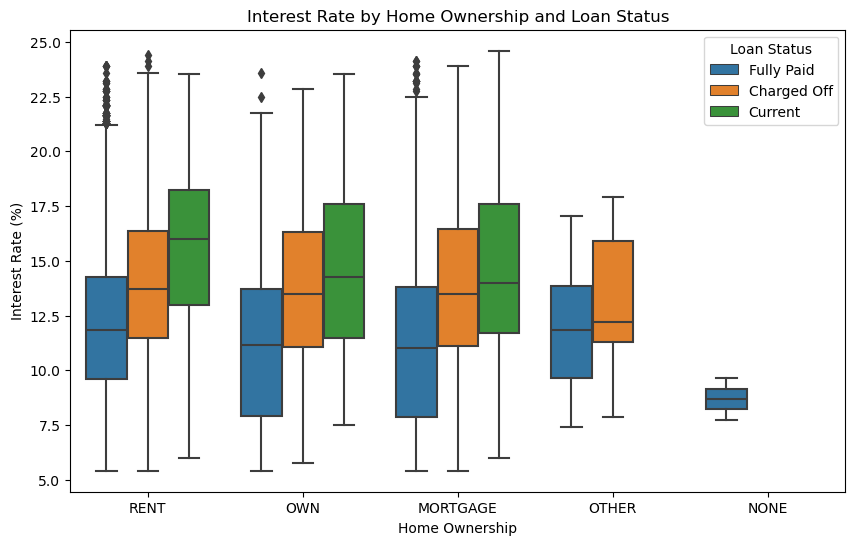

In [33]:


# Assuming `loan_data_cleaned` is the cleaned DataFrame with necessary columns

# Box Plot of Interest Rate by Home Ownership and Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='home_ownership', y='int_rate', hue='loan_status')
plt.title('Interest Rate by Home Ownership and Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status')
plt.show()


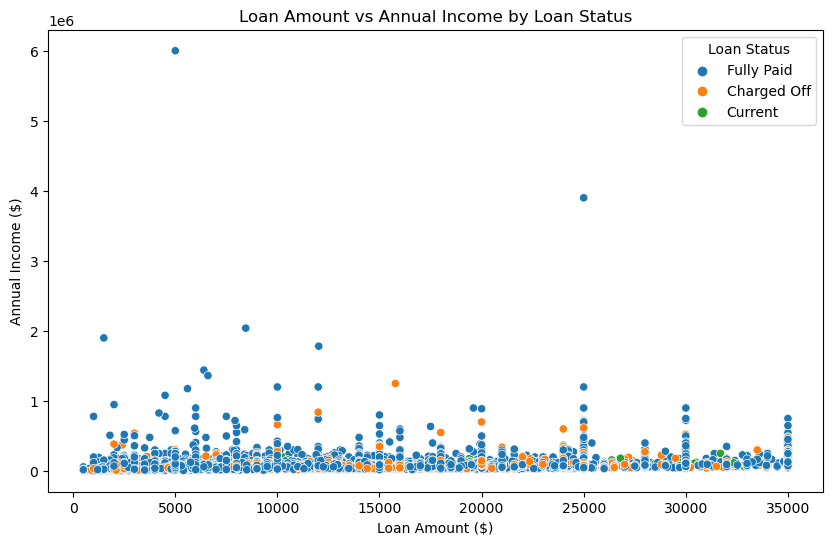

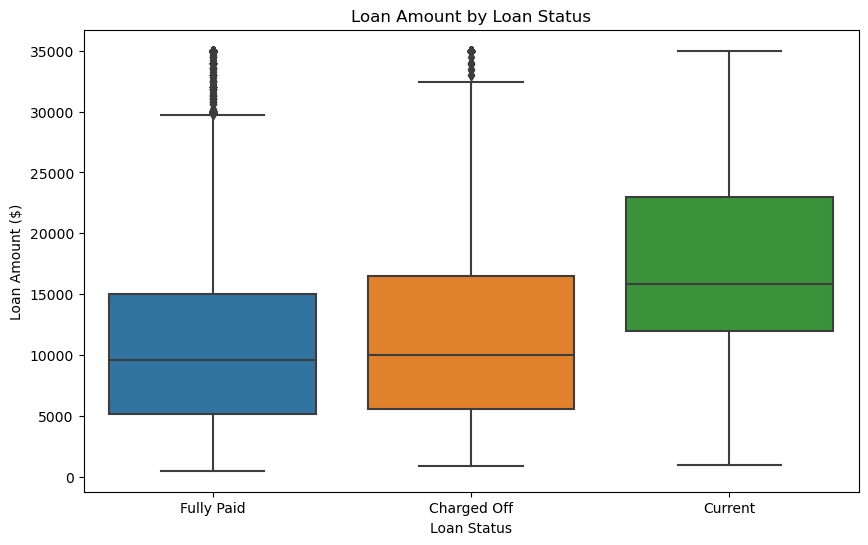

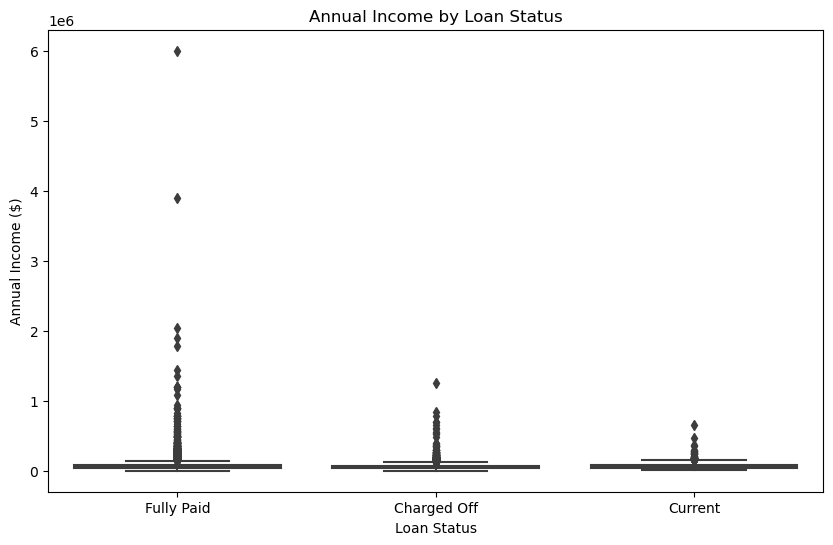

In [34]:


# Assuming `loan_data_cleaned` is the cleaned DataFrame with necessary columns

# Scatter Plot of Loan Amount vs. Annual Income colored by Loan Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data_cleaned, x='loan_amnt', y='annual_inc', hue='loan_status')
plt.title('Loan Amount vs Annual Income by Loan Status')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.legend(title='Loan Status')
plt.show()

# Box Plot for Loan Amount by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.show()

# Box Plot for Annual Income by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='loan_status', y='annual_inc')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.show()
